In [1]:
# To debug the shap package, or output more information during computation, clone the git repo and add its path here.
# This will prepend the local installation of shap and makes sure it is imported in the next cell.

%load_ext autoreload
%autoreload 2
import os
import sys

module_path = os.path.abspath(
    os.path.join('/Users/louislepage/Documents/Gitlab/shap'))  # or the path to your source code
sys.path.insert(0, module_path)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import sklearn as sk
import time

In [3]:
#load prepared data into dataframe

df_x = pd.read_csv("../data/Adult_X.csv", header=None)
df_y = pd.read_csv("../data/Adult_y.csv", header=None)

In [4]:
#train model
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(df_x.values, df_y.values.ravel(), test_size=0.2, random_state=42)

model = sk.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [5]:
#test model
y_pred = model.predict(X_test)
accuracy = sk.metrics.accuracy_score(y_test, y_pred)
conf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8512206356517734
Confusion Matrix:
[[4617  325]
 [ 644  927]]


In [6]:
n_instances = 100
permutations=10

In [7]:
#create SHAP  explainer
#sampling_explainer = shap.explainers.SamplingExplainer(model.predict, df_x.values)
start_exp = time.time()
permutation_explainer = shap.explainers.Permutation(model.predict_proba, df_x.values)
permutation_explainer.masker.max_samples =200
shap_values = permutation_explainer(df_x.iloc[1:1+n_instances],max_evals=2*len(df_x.iloc[1])*(permutations+1))
end_exp = time.time()
total_t=end_exp-start_exp
print("Time:",
      total_t, "s")

[ 0  1  2  3  4  5  6  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 26 27
 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 53
 54 55 56 57 58 60 61 62 63 64 65 68 69 70 74 90 91]
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   3   2   1   1   4   4   5   5  24   4   7   6   3 100   5  83   6
   8  10   6  34   2   3  24  34   1  83  11   5   1   3  26   2   1  79
   2  15   3   1   9  12   2   8   5  15  12   1   4  23   7  23   1  55
  90  15   1   2  97   1 100   2   2   1   4  59   3   2   1   1   4   4
   5   5  24   4   7   6   3 100   5  83   6   8  10   6  34   2   3  24
  34   1  83  11   5   1   3  26   2   1  79   2  15   3   1   9  12   2
   8   5  15  12   1   4  23   7  23   1  55  90  15   1   2  97   1 100
   2   2   1   4  59]
debug:2436
Delta: Calling model for 2436
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   5   5  34   4  79   2 

PermutationExplainer explainer:  81%|████████  | 81/100 [00:00<?, ?it/s]

[ 0  1  2  3  4  5  6  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 26 27
 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 53
 54 55 56 57 58 60 61 62 63 64 65 68 69 70 74 90 91]
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  11   9  55  17   1   6   4   1   6  15   3   1   5  15   3   2   4
  76  23  93   3 100  10   2   5  66   1   2   4   1  12  10  26   1   3
   8  21   2   5   3   1   5  76   3   5   7   4   2  15  99  41   2   6
   1   1  23  12   2  66   1  48   4   8  24   2  11   9  55  17   1   6
   4   1   6  15   3   1   5  15   3   2   4  76  23  93   3 100  10   2
   5  66   1   2   4   1  12  10  26   1   3   8  21   2   5   3   1   5
  76   3   5   7   4   2  15  99  41   2   6   1   1  23  12   2  66   1
  48   4   8  24   2]
debug:2286
Delta: Calling model for 2286
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   6   1  11  99   1  12 

PermutationExplainer explainer:  83%|████████▎ | 83/100 [00:10<00:02,  6.40it/s]

batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   2  12   5  23   6   5 100  48   1  17  76  99   1   3   6   3   4
  23   2   9   1   1   2   3   3  15   8   4  76   5   6   1  24  11   3
  93  55  21   1   5   1   4  26  66  12   3   1   2   1  10   5  41   8
  15  66   4   2   2   1   7  10  15   2   2   4   2  12   5  23   6   5
 100  48   1  17  76  99   1   3   6   3   4  23   2   9   1   1   2   3
   3  15   8   4  76   5   6   1  24  11   3  93  55  21   1   5   1   4
  26  66  12   3   1   2   1  10   5  41   8  15  66   4   2   2   1   7
  10  15   2   2   4]
debug:2286
Delta: Calling model for 2286
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  76  11   5 100   4   7  76   1   1   2   3   9   1  48  10  66   3
  93   6  15   4  23  10   5   3   4  41   4   1   5   1   3   2   2   6
   1   2  23  17   2   1  66  12   2   3   6   2  21   8   1   5   5   4
   3   1 

PermutationExplainer explainer:  84%|████████▍ | 84/100 [00:10<00:02,  7.31it/s]

[ 0  1  2  3  4  5  6  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 26 27
 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 53
 54 55 56 57 58 60 61 62 63 64 65 68 69 70 74 90 91]
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  76  92  12   1   4   5   5   1  10   8  76   2   3   3  45   3   2
  12   9   1   6   5   2   1   1   6  23  76   2   4  10   7   2  41   1
  17  15  48   1 100   3  21  15   5   3   6   1   4   3   2   4  66   2
  74  15   2  11   1   1   7   4  23  66   1 100  76  92  12   1   4   5
   5   1  10   8  76   2   3   3  45   3   2  12   9   1   6   5   2   1
   1   6  23  76   2   4  10   7   2  41   1  17  15  48   1 100   3  21
  15   5   3   6   1   4   3   2   4  66   2  74  15   2  11   1   1   7
   4  23  66   1 100]
debug:2456
Delta: Calling model for 2456
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  10  12   6   2   4  66 

PermutationExplainer explainer:  86%|████████▌ | 86/100 [00:10<00:01,  8.68it/s]

batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   1   5   2   6   4  12   9   1   5  45  66  10   3   6   3   2   6
   3  76  74  23  23   7   7  76 100  48  66 100   3  21   2   1  17   5
   5  15   2  10   2  15   2   4   2   4  11  41   1   1  15   1   1  92
   3  12   1   4   3   1  76   4   8   2   1   1   1   5   2   6   4  12
   9   1   5  45  66  10   3   6   3   2   6   3  76  74  23  23   7   7
  76 100  48  66 100   3  21   2   1  17   5   5  15   2  10   2  15   2
   4   2   4  11  41   1   1  15   1   1  92   3  12   1   4   3   1  76
   4   8   2   1   1]
debug:2456
Delta: Calling model for 2456
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  76   1   7  17   3  76  23   1  12   8   1 100   2   4   3   1  21
   5   5   4 100   1   1   4  10   2  45   2   6   1   6  15   4   2  23
   5  15   3   5   1   1   3  15   3  66   9   1   2   1  92   3  10  48
  76   2 

PermutationExplainer explainer:  87%|████████▋ | 87/100 [00:10<00:01,  7.96it/s]

batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  17 100   5  26  23   7   7  76   3   3  94   5  23  79  10  12   1
  15  34   9   1   4   2   1  15   3   1  34   4  24   1   1   4   1   2
   8   3  48   6   4   2   3  12   1   2   5  11  76   5   5   1  15   6
   2   3   2   2   4  10   1  98  55   1   8  59  17 100   5  26  23   7
   7  76   3   3  94   5  23  79  10  12   1  15  34   9   1   4   2   1
  15   3   1  34   4  24   1   1   4   1   2   8   3  48   6   4   2   3
  12   1   2   5  11  76   5   5   1  15   6   2   3   2   2   4  10   1
  98  55   1   8  59]
debug:2310
Delta: Calling model for 2310
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  79  12  17   1  11   1   2   2   1  10   5   6   1  34  15  26   2
   5   3   1   4   2  94  10   6 100   7   1   5  24   7  12  76   3   5
   1   5   2   8  48  23  55  15  23  34   1   1   2   3   4   3  98   4
  76   1 

PermutationExplainer explainer:  89%|████████▉ | 89/100 [00:11<00:01,  8.63it/s]

masked inputs len:13100
num_varying_rows (len 131): [100  99  10  12   1   4  74  34   4  12   4   1   2   2   5   4   4  24
   7   9   2   1  77   3   2  23   5   1   6  48   1   3   1   8  45  15
   3   6   5  24   2   5   6   1   2   3   2  90  99   1  34   1  17  15
 100  15   5   3  41   8  11   2   1   7   3  21  99  10  12   1   4  74
  34   4  12   4   1   2   2   5   4   4  24   7   9   2   1  77   3   2
  23   5   1   6  48   1   3   1   8  45  15   3   6   5  24   2   5   6
   1   2   3   2  90  99   1  34   1  17  15 100  15   5   3  41   8  11
   2   1   7   3  21]
debug:2272
Delta: Calling model for 2272
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   1   5   3   5  15   1   2   2   4   6  74  21   3  15   2  90   3
   1  24   2   1  12   6  17   3   7   7 100   3   5   9   2  11   1   1
   8   1   4   6  41   2  23   4  34   5   2  15   1  34  45  48   2   1
  12  99  99   1  24  10   4   4   8   5   3  77   1  

PermutationExplainer explainer:  90%|█████████ | 90/100 [00:11<00:01,  8.91it/s]

debug:2758
Delta: Calling model for 2758
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  74   4   2   1  97   2   3   1   3  77   6  10   3  15   6  79   5
   1   4  89   9  11  66  24  12  24   1   1   5   2   3   5   5   1  23
   1  97   2   4  12   7 100  41   1   6   8  45  15   4   4  98   1   8
   1   1   7   5  85  10   2   2   3   2  66  17  74   4   2   1  97   2
   3   1   3  77   6  10   3  15   6  79   5   1   4  89   9  11  66  24
  12  24   1   1   5   2   3   5   5   1  23   1  97   2   4  12   7 100
  41   1   6   8  45  15   4   4  98   1   8   1   1   7   5  85  10   2
   2   3   2  66  17]
debug:2758
Delta: Calling model for 2758
107
DELTA
mask len: 130
masked inputs len:6600
num_varying_rows (len 66): [100  74  75   6   3  97  97   5   4   4  79  78  14  13  16  21  81  82
   6   5  89  90  18  70  83  33  29  25   2   5   7   5   8   5   6  24
  24  97  97   6  15  19 100 100  42   7  14  47  59  17   8  98

PermutationExplainer explainer:  91%|█████████ | 91/100 [00:11<00:01,  8.17it/s]

batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  59   7   4   1   4   6   1   8   2  85   5   4  55  96   9   1  34
   7   3   2  15  96   1   1   1   2  11   2   1  15   2   4   2   5  34
   1   3   3   1  10  12   1  24   5 100  17   6   6   3  23   1  12   5
  48  26   8  21  24   3   2   2   5  10   3  23  59   7   4   1   4   6
   1   8   2  85   5   4  55  96   9   1  34   7   3   2  15  96   1   1
   1   2  11   2   1  15   2   4   2   5  34   1   3   3   1  10  12   1
  24   5 100  17   6   6   3  23   1  12   5  48  26   8  21  24   3   2
   2   5  10   3  23]
debug:2086
Delta: Calling model for 2086
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   7   5   3   2   5   2  10  15   6   1   1  17   4   1  23   2   8
  10   2  26   3   4   3   8   1   3   5   7  21   1  55  24  85 100  23
  12   1   1   2  24   1   3   1   4  34   9   2  15   6  48   5  34  96
  59   2 

PermutationExplainer explainer:  92%|█████████▏| 92/100 [00:11<00:01,  7.65it/s]

masked inputs len:13100
num_varying_rows (len 131): [100   4  76   2   5  26   1   1   2   2  24  41   6   4   1  15  17  77
   7   9   4   3   1  77  15   3  66  11  92  48  10 100   1   2  23   6
  45   5   3   1   6   3   2   5   7   8   3   2   2   2   3   5   5  12
  10   1  21   4  12  66   1  85   1   1   4   1   4  76   2   5  26   1
   1   2   2  24  41   6   4   1  15  17  77   7   9   4   3   1  77  15
   3  66  11  92  48  10 100   1   2  23   6  45   5   3   1   6   3   2
   5   7   8   3   2   2   2   3   5   5  12  10   1  21   4  12  66   1
  85   1   1   4   1]
debug:2316
Delta: Calling model for 2316
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  11   1   3   2   2   5   5   2   4   3  23   1  77  66   6   1 100
  10  15   7  21   1   3   1   3   1   2   2   1  85   1  48   8  10  24
   4   5  12   1   3  17   4   6  15  77  12   1  76   1   3  66   7  45
   4   9   4   5  92   2   6   5   2  41   2  26  11  

PermutationExplainer explainer:  93%|█████████▎| 93/100 [00:11<00:00,  7.39it/s]

batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   1  15   5  10   4  89  41  15   5  21   1   2   1   3   4   5   3
  77  23   2   6   1   3   4   1  17   1   2  85   9   2   6   7  45   5
   3   1  66   8   1   2  92   5  99   2   6  88   4   3   3   2   2   1
  26 100  24   4   1  66   1  12  76   7  77  10   1  15   5  10   4  89
  41  15   5  21   1   2   1   3   4   5   3  77  23   2   6   1   3   4
   1  17   1   2  85   9   2   6   7  45   5   3   1  66   8   1   2  92
   5  99   2   6  88   4   3   3   2   2   1  26 100  24   4   1  66   1
  12  76   7  77  10]
debug:2726
Delta: Calling model for 2726
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  21   1   8  41   7  10   3   2  24   3   3  17  23  76   1   3  88
   5  77   2   7  12   6  26   1   4   1   5   2   4   2   2   5   1  85
   2   4  66   3   1  99  10   6  66   1   2 100   1   5   1  15   3  89
   4  15 

PermutationExplainer explainer:  94%|█████████▍| 94/100 [00:11<00:00,  7.91it/s]

masked inputs len:13100
num_varying_rows (len 131): [100  66  90  17  41  89   5   6   5  15   2   2  26   7   1   3   2  55
   5 100   1   1 100   3   1   1   6   2   8   2  12  10  99   2   8  76
  96   1   5   2   1  15   3  15  23   6   1   3  24  76   3  99   2   5
   4   3   4  21  96   4   1  12   7  91  66  23  66  90  17  41  89   5
   6   5  15   2   2  26   7   1   3   2  55   5 100   1   1 100   3   1
   1   6   2   8   2  12  10  99   2   8  76  96   1   5   2   1  15   3
  15  23   6   1   3  24  76   3  99   2   5   4   3   4  21  96   4   1
  12   7  91  66  23]
debug:3262
Delta: Calling model for 3262
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   6   2   3  26   1  99   1  41   3   3   1  76   3  15  90   5   8
  66   6   3 100   1  21  12   5   6  17  66   2   4  12  24   8   2   5
  23   4   1   5  91   3  10   1 100   2   1   4  23  99  96  76  15   1
  89   2  55   2   5   2   2   1   7   7  15  96   6  

PermutationExplainer explainer:  95%|█████████▌| 95/100 [00:11<00:00,  6.49it/s]

batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   8   2   5  23   4   3   1   1   6   2  83  24  55   3   4   4  10
  15   9  59   6   2  79  98   1  24   2   8  15   5   1  26   1   5   4
   7   2   3  34   2  12   7   5  23  10   5  83   1   1   3   3   1  12
  11  34   3   4   2  48 100  94   1   1  15   1   8   2   5  23   4   3
   1   1   6   2  83  24  55   3   4   4  10  15   9  59   6   2  79  98
   1  24   2   8  15   5   1  26   1   5   4   7   2   3  34   2  12   7
   5  23  10   5  83   1   1   3   3   1  12  11  34   3   4   2  48 100
  94   1   1  15   1]
debug:2352
Delta: Calling model for 2352
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   3   8  34   8  83  24   9   4   3  24  12   5   6   4  94   3   2
   1  79   1  26   1   1   1   3   4   7  23  98   3   2   1  23  15   1
  55   5   5   6   1   2   7  10   2   5  11   2   1   4   5 100   2   1
  48  15 

PermutationExplainer explainer:  96%|█████████▌| 96/100 [00:12<00:00,  6.26it/s]

batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   3   7  77  94   3  34   8  45   2   4  93   2   3   2  12  24   2
   1  10  12   1   1   2   2  15   5   4  77   9   2  41   4   1  17   1
  10   2  11   6  74  24   6   1  79   1   5   8  77 100   1   4   5   1
  15   3   3   5   4   1  15   3   1  34  89   5   3   7  77  94   3  34
   8  45   2   4  93   2   3   2  12  24   2   1  10  12   1   1   2   2
  15   5   4  77   9   2  41   4   1  17   1  10   2  11   6  74  24   6
   1  79   1   5   8  77 100   1   4   5   1  15   3   3   5   4   1  15
   3   1  34  89   5]
debug:2526
Delta: Calling model for 2526
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   3  11   1   5   2   2   1  77  24   1   4   1  77   6  12   8   4
   1   2   3   1  15  45  41  89  94  77  10   5   1   9  24  15   1   6
  34   2   5  10   1  74   4   1   3   2  17   4   3   4  15  93   5   5
   8  34 

PermutationExplainer explainer:  99%|█████████▉| 99/100 [00:12<00:00,  7.63it/s]

batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   1  59  77   6   2   1 100   2   1   3   1   1  15  24  26   5  34
   7   1  10   3   8   1  24   4   5   2  12  23  77   7   9  15  11  15
   2  55   5  99   4   3   5  17   1   4   3   2  34   2   4  90  12   3
   6   1   2   3   8   1  21   6   4   5   2   1   1  59  77   6   2   1
 100   2   1   3   1   1  15  24  26   5  34   7   1  10   3   8   1  24
   4   5   2  12  23  77   7   9  15  11  15   2  55   5  99   4   3   5
  17   1   4   3   2  34   2   4  90  12   3   6   1   2   3   8   1  21
   6   4   5   2   1]
debug:2094
Delta: Calling model for 2094
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  26   1   1   2  77   3   3  24  90  77   4   5   7  34  23   4   2
  34   1   3   1  12   5  11   1   8  55   6  15   1   2   4   5   8   6
   2   2   1   1   1   5  21  15   2   4   1   1   4  24   2   5  10   6
   3  99 

PermutationExplainer explainer: 100%|██████████| 100/100 [00:12<00:00,  7.35it/s]

debug:2822
Delta: Calling model for 2822
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  34   5   1  24 100   1   1   3  17   1  10   3  76   1   4   2  23
   5   1  45  98  41   1  48  10   6   4  12   6   4  93  92  89   2   2
   3  12   4   1  79   3   9  77   1   6   1  34   2  85   5   1  26   3
  15  76   2   2   7   4   5   3   8  15   5   2  34   5   1  24 100   1
   1   3  17   1  10   3  76   1   4   2  23   5   1  45  98  41   1  48
  10   6   4  12   6   4  93  92  89   2   2   3  12   4   1  79   3   9
  77   1   6   1  34   2  85   5   1  26   3  15  76   2   2   7   4   5
   3   8  15   5   2]
debug:2822
Delta: Calling model for 2822
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  89   8   2  93   3   1   1   3  77   1   3   3  17  41   1   2  15
  45   4  76  76   2   3   1  10   7   6   9   2   1   3  48  15   4  26
   5   1  12   6   1  92  34   5  24 

PermutationExplainer explainer: 101it [00:12,  1.57it/s]                         

masked inputs len:13100
num_varying_rows (len 131): [100   1  12   5   2   3   5  15   1   2  17  24  59  12   4   2   5  15
   3   6   4  90   8   4   1   2   2   3   9  24   1   2   7 100   1   5
   6   4  23   3  11   7   4  21  23  34   1   1  34   1  94  26   1  55
   2   1   5   2  15  94   3  10   3  48   1   8   1  12   5   2   3   5
  15   1   2  17  24  59  12   4   2   5  15   3   6   4  90   8   4   1
   2   2   3   9  24   1   2   7 100   1   5   6   4  23   3  11   7   4
  21  23  34   1   1  34   1  94  26   1  55   2   1   5   2  15  94   3
  10   3  48   1   8]
debug:2094
Delta: Calling model for 2094
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100   5  12   1  24  23   1  94   3   9   3   8   1   2   5 100   6  48
   4  17   8  59   2   2   2  12   1   3   2   4   1   6  15   1   7   1
   1  23   2   4   5  94  34   4  15  90   2  24  21   5   3  26  55   1
   1   3   7  34   3  11   1  10   4  15   5   2   5  

In [23]:
filename="../data/python_shap_permutation.csv"
data = {
    'num_instances': [n_instances+1],
    'runtime_seconds': [total_t],
}
df_times=pd.DataFrame(data)
df_times.to_csv(filename, mode='a', header=not os.path.exists(filename))

In [8]:
row=np.genfromtxt("../data/values/adult/by-row.csv", delimiter=',')
final=np.genfromtxt("../data/values/adult/final.csv", delimiter=',')

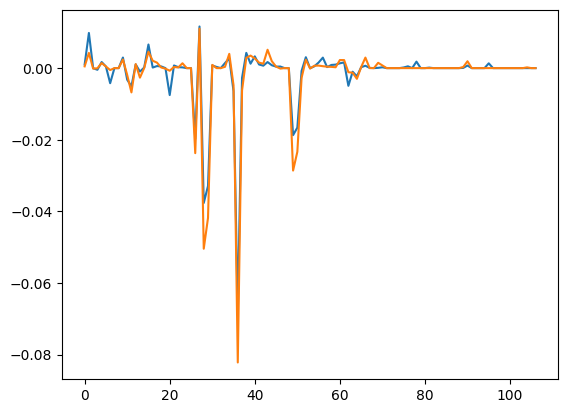

In [19]:
plt.plot(row[2])
plt.plot(final[2])